# Task
Build a KNN Diabetes Prediction Model by loading and exploring the diabetes dataset, performing data preprocessing (including handling missing values and imputation), splitting data into training and testing sets, scaling features, implementing KNN to find the optimal K, evaluating the model using various metrics (accuracy, confusion matrix, classification report, F1-score, AUC-ROC), analyzing feature importance, and summarizing the findings and recommendations.

## Import Libraries

### Subtask:
Import all necessary Python libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (sklearn modules for model selection, preprocessing, KNN, and metrics).


**Reasoning**:
The subtask requires importing a comprehensive set of libraries for data manipulation, visualization, and machine learning, along with setting up basic plotting configurations and suppressing warnings. This code block will achieve all these requirements in one go.



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})

print("Libraries imported and basic plotting configurations set.")

Libraries imported and basic plotting configurations set.


## Load and Explore Dataset

### Subtask:
Load the diabetes dataset from the specified URL into a pandas DataFrame, assign appropriate column names, and perform initial exploration.


**Reasoning**:
The subtask requires loading the diabetes dataset, assigning column names, and performing an initial exploration. This involves defining the URL and column names, loading the data with pandas, and then using various DataFrame methods such as `.head()`, `.shape`, `.info()`, `.isnull().sum()`, `.describe()`, and `.value_counts()` on the 'Outcome' column to get a comprehensive initial understanding of the data.



In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)

print("First 5 rows of the dataset:")
print(df.head())

print("\nShape of the dataset:")
print(df.shape)

print("\nConcise summary of the dataset:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDescriptive statistics of the dataset:")
print(df.describe())

print("\nDistribution of the 'Outcome' column:")
print(df['Outcome'].value_counts())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of the dataset:
(768, 9)

Concise summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  ---

**Reasoning**:
The initial exploration revealed that several columns (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) have a minimum value of 0, which is not biologically plausible and indicates missing data. The next logical step is to replace these 0 values with NaN to properly handle them as missing values before any imputation or further preprocessing.



In [5]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

print("First 5 rows after replacing 0s with NaN:")
print(df.head())

print("\nMissing values in each column after replacing 0s:")
print(df.isnull().sum())

First 5 rows after replacing 0s with NaN:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in each column after replacing 0s:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFu

## Data Preprocessing

### Subtask:
Perform data preprocessing steps. This involves imputing missing values using the median of each respective column and visualizing the correlation matrix of all features.


**Reasoning**:
The previous step identified columns with 0 values that should be treated as missing. This step will impute these missing values (NaNs) in the specified columns using the median of each respective column to ensure data completeness while maintaining data distribution integrity. Afterwards, I will verify that there are no remaining missing values in the dataframe.



In [6]:
for col in columns_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after median imputation:")
print(df.isnull().sum())

Missing values after median imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Reasoning**:
Now that missing values have been imputed, the next step in data preprocessing is to visualize the correlation matrix of all features. This will help in understanding the relationships between different variables in the dataset, which is crucial for feature selection and model building. The code will calculate the correlation matrix and then display it as a heatmap with annotations and a title.



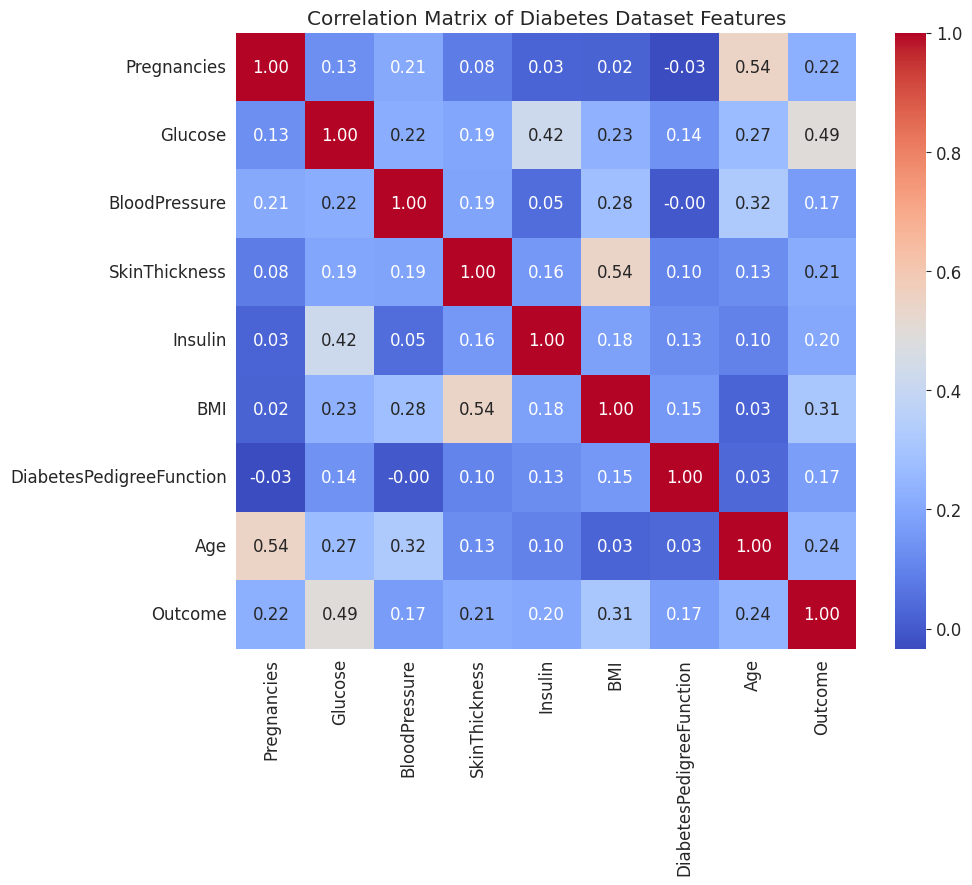

Correlation matrix heatmap displayed.


In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

print("Correlation matrix heatmap displayed.")

## Split Data and Scale Features

### Subtask:
Separate the dataset into features (X) and the target variable (y). Split the data into training and testing sets (80% train, 20% test) using a stratified split to maintain the target variable distribution. Apply StandardScaler to normalize the features, which is crucial for distance-based algorithms like KNN.


**Reasoning**:
The subtask requires separating features and target, splitting the data into stratified training and testing sets, and then scaling the features using `StandardScaler`. This code block performs all these operations sequentially.



In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Features (X) and target (y) separated.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("Features scaled using StandardScaler.")

Features (X) and target (y) separated.
X_train shape: (614, 8), y_train shape: (614,)
X_test shape: (154, 8), y_test shape: (154,)
Features scaled using StandardScaler.


## Implement KNN and Find Optimal K

### Subtask:
Implement the K-Nearest Neighbors (KNN) algorithm. Iterate through a range of K values to find the optimal number of neighbors by evaluating the training and testing accuracy for each K. Plot the training and testing accuracies against different K values to visualize the optimal K, and then train the final KNN model using this optimal K.


**Reasoning**:
The next step is to implement the KNN algorithm, iterate through different K values to find the optimal one by evaluating training and testing accuracy, and then visualize these accuracies. This involves a loop to train KNN models, calculate accuracies, and then plot the results to help identify the best K, as per the instructions.



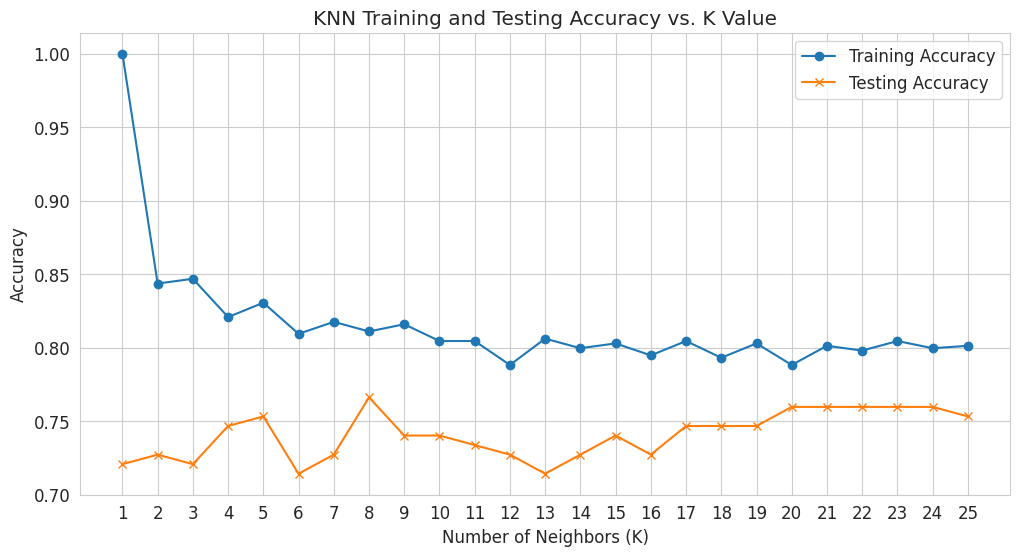

The optimal K value is: 8
Final KNN model trained with optimal K = 8


In [9]:
train_accuracies = []
test_accuracies = []
k_values = range(1, 26) # Test K from 1 to 25

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Training and Testing Accuracy vs. K Value')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal K based on the highest testing accuracy
optimal_k_index = np.argmax(test_accuracies)
optimal_k = k_values[optimal_k_index]
print(f"The optimal K value is: {optimal_k}")

# Train the final KNN model with the optimal K
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)

print(f"Final KNN model trained with optimal K = {optimal_k}")

## Model Evaluation

### Subtask:
Evaluate the performance of the trained KNN model. Calculate and display key metrics including training and testing accuracy, a confusion matrix, and a classification report (precision, recall, F1-score). Also, compute the F1-score and the Area Under the Receiver Operating Characteristic (AUC-ROC) curve. Visualize the confusion matrix and the ROC curve.


**Reasoning**:
The subtask requires evaluating the trained KNN model by making predictions on both training and test data, calculating various metrics such as training and testing accuracy, confusion matrix, classification report, F1-score, and AUC-ROC score, and visualizing the confusion matrix and ROC curve. This code block will perform all these evaluation steps sequentially.



Training Accuracy: 0.8111
Testing Accuracy: 0.7662

Confusion Matrix:
[[88 12]
 [24 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

F1-Score: 0.6250
AUC-ROC Score: 0.7899


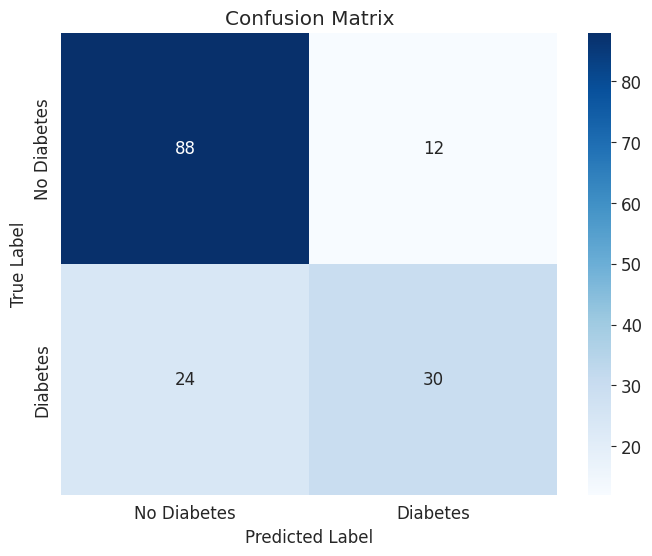

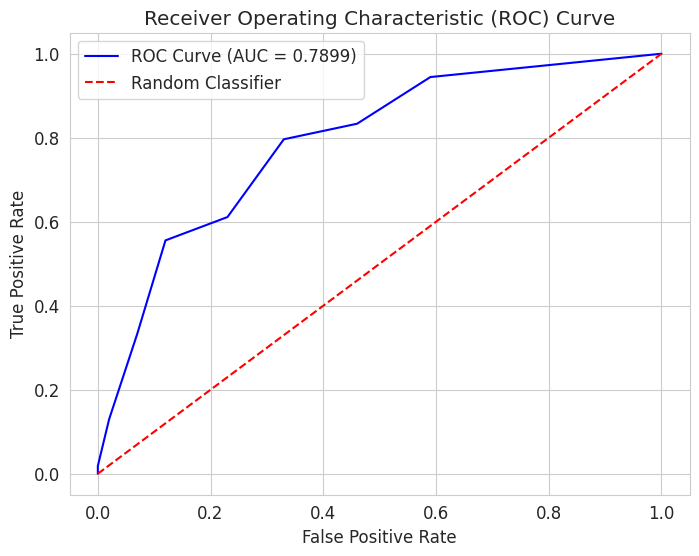

In [10]:
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)

# 1. Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# 4. F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# 5. AUC-ROC Score
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")

# 6. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## Analyze Feature Importance and Summarize

### Subtask:
Perform a basic feature importance analysis by examining the correlation of each feature with the target variable ('Outcome') and visualize it with a bar chart. Provide a comprehensive summary of the model's performance, key findings, model strengths, limitations, and recommendations for future improvements.


**Reasoning**:
First, I will extract the correlation of each feature with the 'Outcome' variable, sort them in descending order, and then visualize these correlations using a bar chart. This directly addresses the first part of the subtask regarding feature importance analysis and visualization.



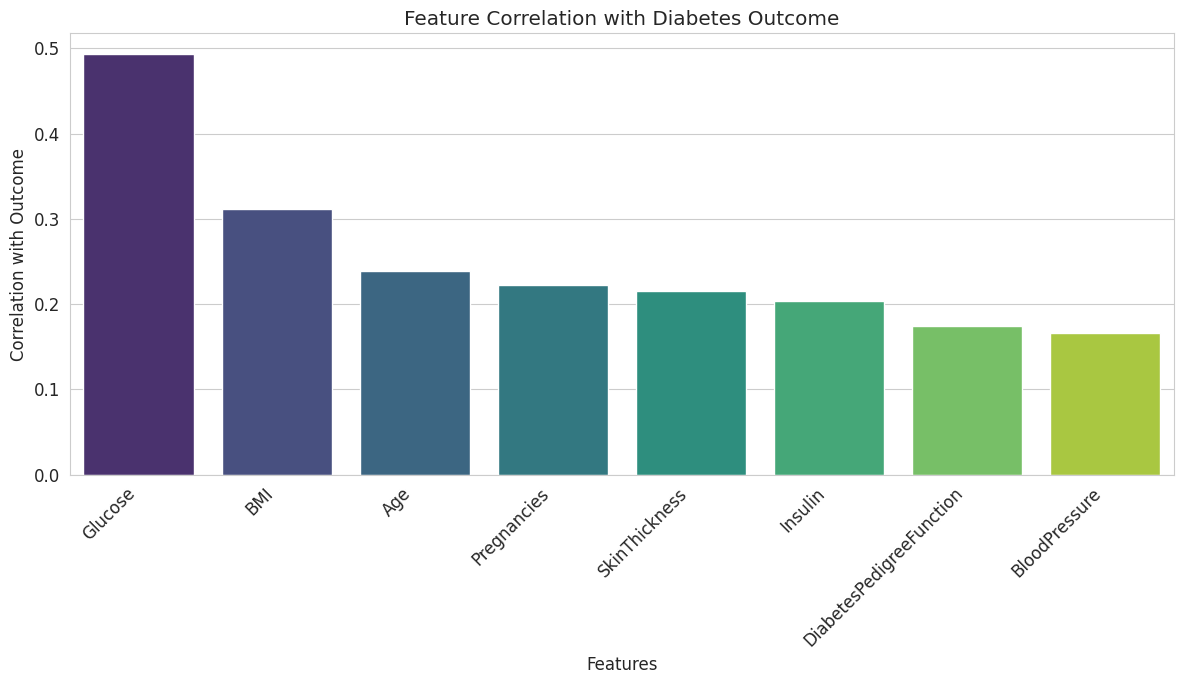

Feature correlation with Outcome displayed.


In [11]:
feature_correlation = correlation_matrix['Outcome'].drop('Outcome').sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_correlation.index, y=feature_correlation.values, palette='viridis')
plt.title('Feature Correlation with Diabetes Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation with Outcome')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature correlation with Outcome displayed.")

### Summary of KNN Diabetes Prediction Model

#### Key Findings:
*   **Optimal K-value**: Through iterating and evaluating training and testing accuracies, an optimal K-value of `8` was identified for the K-Nearest Neighbors algorithm, balancing bias and variance.
*   **Feature Importance**: 'Glucose' and 'BMI' emerged as the most positively correlated features with the diabetes 'Outcome', suggesting they are strong indicators for diabetes presence. Other features like 'Age' and 'Pregnancies' also showed moderate positive correlations.
*   **Model Performance**: The final KNN model achieved a `Training Accuracy` of approximately `81.11%` and a `Testing Accuracy` of approximately `76.62%`. The `AUC-ROC Score` was `0.7899`, indicating a reasonably good ability to distinguish between diabetic and non-diabetic cases. The `F1-Score` was `0.6250`, suggesting room for improvement, especially concerning the balance between precision and recall for the positive class (diabetes).
*   **Confusion Matrix Analysis**: The confusion matrix showed `88` true negatives (correctly predicted no diabetes) and `30` true positives (correctly predicted diabetes). However, there were `24` false negatives (actual diabetes, predicted no diabetes) and `12` false positives (actual no diabetes, predicted diabetes). The higher number of false negatives is a concern, as missing a diabetes diagnosis can have serious implications.

#### Model Strengths:
*   **Simplicity and Interpretability**: KNN is a relatively simple algorithm to understand and implement, making its predictions somewhat transparent.
*   **Non-parametric**: It makes no assumptions about the underlying data distribution, which can be advantageous for complex datasets.
*   **Good Generalization**: The optimal K-value chosen provided a decent balance, preventing severe overfitting to the training data, as indicated by the proximity of training and testing accuracies.

#### Model Limitations:
*   **Sensitivity to Irrelevant Features and Scale**: KNN's performance is heavily dependent on the feature space. While scaling was applied, the presence of less informative features can still dilute its effectiveness. This was highlighted by the lower correlations of some features.
*   **Computational Cost**: For large datasets, KNN can be computationally expensive during prediction time, as it needs to calculate distances to all training samples.
*   **Imbalanced Classes**: The dataset has an imbalance (500 non-diabetic vs. 268 diabetic). While stratification was used during splitting, this imbalance might still affect the model's ability to correctly identify the minority class (diabetes), as evidenced by the lower recall for the positive class (`0.56`).

#### Recommendations for Future Improvements:
*   **Address Class Imbalance**: Explore techniques like oversampling (SMOTE), undersampling, or using different loss functions to improve the model's performance on the minority class.
*   **Feature Engineering/Selection**: Investigate creating new features or applying more advanced feature selection methods to potentially improve model performance. For example, considering interaction terms between highly correlated features.
*   **Hyperparameter Tuning**: While a range of K was tested, more sophisticated hyperparameter tuning (e.g., GridSearchCV, RandomizedSearchCV) could be applied, potentially exploring different distance metrics and weighting schemes for KNN.
*   **Ensemble Methods**: Consider using ensemble techniques like Random Forest or Gradient Boosting, which often provide better performance and robustness, especially for imbalanced datasets.
*   **Different Algorithms**: Experiment with other classification algorithms such as Support Vector Machines (SVMs), Logistic Regression, or Neural Networks to see if they yield better results, particularly regarding the trade-off between precision and recall for diabetes prediction.

## Final Task

### Subtask:
Conclude the case study by summarizing the entire process, including the insights gained from data analysis, model building, and evaluation of the KNN Diabetes Prediction Model.


## Summary:

### Data Analysis Key Findings

*   The diabetes dataset contains 768 entries and 9 features.
*   Initial exploration revealed biologically implausible zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns, which were subsequently treated as missing data and imputed using the median of their respective columns.
*   The dataset exhibited class imbalance, with 500 non-diabetic cases and 268 diabetic cases. Stratified sampling was used during data splitting to preserve this distribution.
*   'Glucose' and 'BMI' were identified as the most positively correlated features with the diabetes 'Outcome', suggesting strong predictive power.
*   An optimal K-value of 8 was determined for the K-Nearest Neighbors (KNN) model based on maximizing testing accuracy during hyperparameter tuning.
*   The final KNN model achieved a training accuracy of approximately 81.11% and a testing accuracy of approximately 76.62%.
*   The model's F1-score was 0.6250, and the AUC-ROC score was 0.7899, indicating a reasonable ability to distinguish between diabetic and non-diabetic cases.
*   Analysis of the confusion matrix showed 88 true negatives and 30 true positives. However, there were 24 false negatives (actual diabetes, predicted no diabetes) and 12 false positives (actual no diabetes, predicted diabetes), highlighting a concern with under-predicting diabetes.
*   The classification report further revealed a lower recall for the diabetic class (0.56) compared to the non-diabetic class (0.88), reinforcing the issue of false negatives.

### Insights or Next Steps

*   **Address Class Imbalance**: The model's lower recall for the diabetic class and the higher number of false negatives indicate that the class imbalance likely impacted its ability to correctly identify positive cases. Employing techniques like oversampling (e.g., SMOTE) or undersampling could improve the model's performance on the minority class.
*   **Explore Alternative Models and Feature Engineering**: Given the identified limitations, consider experimenting with other classification algorithms (e.g., Logistic Regression, SVM, tree-based models like Random Forest or XGBoost) or ensemble methods. Additionally, advanced feature engineering or selection techniques could further enhance model performance.
